In [1]:
import numpy as np
import scanpy as sc
import scipy.sparse

import sys
sys.path.append("../")
sys.path.append("../../scTenifoldpy")
from scTenifoldXct.core import scTenifoldXct
from scTenifoldXct.visualization import get_Xct_pairs, plot_XNet

%load_ext autoreload
%autoreload 2

In [3]:
ada = sc.datasets.paul15()[:, :100]  # raw counts
ada.layers['raw'] = np.asarray(ada.X, dtype=int)
sc.pp.log1p(ada)
ada.layers['log1p'] = ada.X.copy()

xct_obj = scTenifoldXct(data=ada, 
                        cell_names=['14Mo', '15Mo'],
                        obs_label="paul15_clusters",
                        rebuild_GRN=True, 
                        GRN_file_dir='./Net_for_Test',  # rebuilding time 30 secs
                        query_DB=None, verbose=True)

... storing 'paul15_clusters' as categorical
Trying to set attribute `._uns` of view, copying.


(cell, feature): (373, 100)
(cell, feature): (186, 100)
Selected 0 LR pairs
building GRN 14Mo...
make_networks  processing time:  24.78328110000001
cal_pcNet  processing time:  24.783370099999985
GRN of 14Mo has been built
building GRN 15Mo...
make_networks  processing time:  21.60356109999998
cal_pcNet  processing time:  21.6036962
GRN of 15Mo has been built
building correspondence...
Trying to concatenate pcnet using <scTenifoldXct.core.GRN object at 0x000002B4809433D0>
Net(
  (linear1): Linear(in_features=373, out_features=132, bias=True)
  (linear2): Linear(in_features=132, out_features=33, bias=True)
  (linear3): Linear(in_features=33, out_features=3, bias=True)
)
Net(
  (linear1): Linear(in_features=186, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=23, bias=True)
  (linear3): Linear(in_features=23, out_features=3, bias=True)
)


In [10]:
ada = sc.read_h5ad('../data/LS.h5ad')
ada

AnnData object with n_obs × n_vars = 5011 × 17328
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [ ]:
ada = sc.datasets.paul15()[:, :100]  # raw counts
ada.layers['raw'] = np.asarray(ada.X, dtype=int)
sc.pp.log1p(ada)
ada.layers['log1p'] = ada.X.copy()

xct_obj = scTenifoldXct(data=ada, 
                        cell_names=['14Mo', '15Mo'],
                        obs_label="paul15_clusters",
                        rebuild_GRN=True, 
                        GRN_file_dir='./Net_for_Test',  # rebuilding time 30 secs
                        query_DB=None, verbose=True)

In [4]:
xct_obj._candidates

[]

1 547.4581298828125
10 540.89208984375
20 305.087158203125
30 307.7550048828125
40 241.76800537109375
50 231.66885375976562
60 225.5106964111328
70 216.9022216796875
80 209.27674865722656
90 202.20814514160156
100 195.55271911621094
110 189.39608764648438
120 184.0304412841797
130 180.13319396972656
140 177.64976501464844
150 175.61720275878906
160 173.74014282226562
170 172.09378051757812
180 174.64523315429688
190 170.4765625
200 170.54649353027344
210 168.6890411376953
220 167.5848388671875
230 166.6317138671875
240 165.99664306640625
250 165.3920135498047
260 165.01470947265625
270 165.80563354492188
280 164.22164916992188
290 163.8953399658203
300 163.39111328125
310 162.99600219726562
320 162.7292938232422
330 162.9435272216797
340 162.66831970214844
350 163.04754638671875
360 161.75650024414062
370 161.43951416015625
380 161.13172912597656
390 161.3242950439453
400 161.4548797607422
410 160.68572998046875
420 160.67686462402344
430 160.5183868408203
440 160.30967712402344
450 16

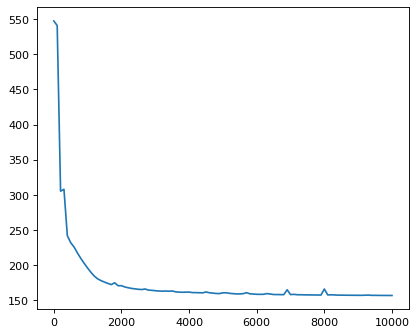

computing pair-wise euclidean distances...
adding column 'correspondence'...


In [5]:
emb, losses = xct_obj.train_nn(n_steps= 1000, lr = 0.001, dist_metric="euclidean")

In [6]:
xct_obj.aligned_dist

,ligand,receptor,dist,correspondence
0610007L01Rik_0610007L01Rik,0610007L01Rik,0610007L01Rik,0.025171,3.079201
0610007L01Rik_0610009O20Rik,0610007L01Rik,0610009O20Rik,0.076381,0.538233
0610007L01Rik_0610010K14Rik,0610007L01Rik,0610010K14Rik,0.015611,6.019151
0610007L01Rik_0910001L09Rik,0610007L01Rik,0910001L09Rik,0.018888,4.616741
0610007L01Rik_1100001G20Rik,0610007L01Rik,1100001G20Rik,0.055681,1.079058
...,...,...,...,...
AB124611_9830001H06Rik,AB124611,9830001H06Rik,0.176467,0.027640
AB124611_A030009H04Rik,AB124611,A030009H04Rik,0.202751,0.015841
AB124611_A930001N09Rik,AB124611,A930001N09Rik,0.237323,0.007936
AB124611_AA987161,AB124611,AA987161,0.233907,0.000000



Total enriched: 0 / 10000


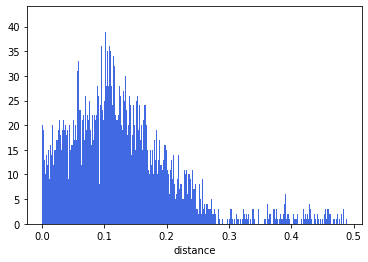

Empty DataFrame
Columns: [ligand, receptor, dist, correspondence, p_val, enriched_rank]
Index: []


In [7]:
null_test_result = xct_obj.null_test(pct = 1, plot_result=True)
print(null_test_result)

In [8]:
null_test_result

,ligand,receptor,dist,correspondence,p_val,enriched_rank


In [9]:
targets = get_Xct_pairs(null_test_result)
targets

()

In [ ]:
a = 4

s = xct_obj.plot_pcNet_graph(view='sender', gene_names=[targets[a][0]],
                             top_edges=30, show = True, verbose = True)
t = xct_obj.plot_pcNet_graph(view='sender', gene_names=[targets[a][1]], 
                             top_edges=30, show = True, verbose = True)

x = plot_XNet(s, t, gene_pairs = [targets[a]], df_enriched=null_test_result)

In [ ]:
targets

In [ ]:
a = 4
t = xct_obj.plot_pcNet_graph(view='sender', gene_names=[targets[a][1]], 
                             top_edges=30, show = True, verbose = True)